In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [19]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**<h1>Exploratory Data Analysis (EDA)**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

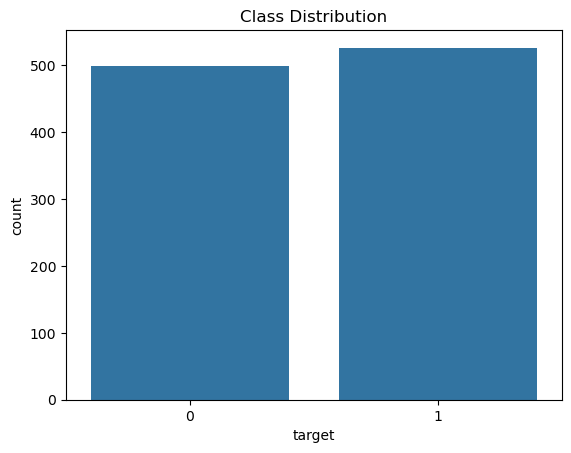

In [20]:
print(df.isnull().sum())
print(df.describe())
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

**<h1>Feature Selection and Preprocessing**

In [21]:
#Define independent variables (x) and target variable(y)
x=df.drop("target",axis=1)
y=df["target"]

#split the dataset into training and testing sets (80-20 split)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Standardize the features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


**<h1>Train Logistic Regression Model**

In [22]:
#Train Logistic Regression Model
model=LogisticRegression()
model.fit(x_train,y_train)

#Predict on the test data
y_pred=model.predict(x_test)

**<h1>Model Evaluation**

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



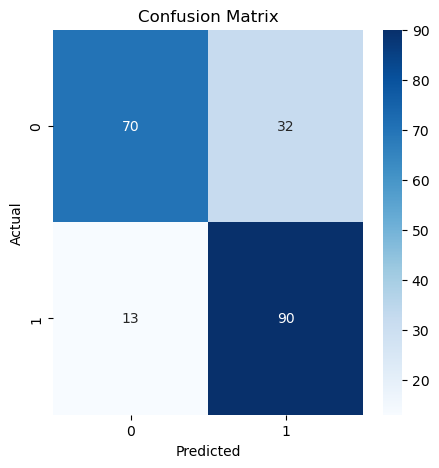

In [23]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Classification Report 
print("\nClassification Report:\n",classification_report(y_test,y_pred))

#Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()